Credits: https://github.com/Holmes-Alan/ImageNet_sample/tree/main

In [1]:
import torch
import torchvision

In [2]:
import torch
from torchvision import models
model = models.alexnet(pretrained=True)
model.eval()

d:\University folder\Foundations of Artificial Intelligence\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\University folder\Foundations of Artificial Intelligence\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

The best prediction:

'./polar_bear.jpg': 99.87646484375% is a 'ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus'

Top 5 prediction:

99.87646484375% is a 'ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus'
0.10136964172124863% is a 'white wolf, Arctic wolf, Canis lupus tundrarum'
0.019349833950400352% is a 'Arctic fox, white fox, Alopex lagopus'
0.0025697059463709593% is a 'Samoyed, Samoyede'
0.00015759306552354246% is a 'kuvasz'


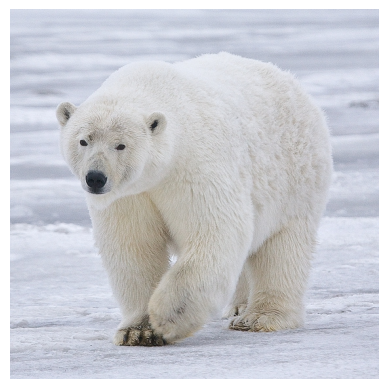

In [3]:
# sample execution (requires torchvision)
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

filename = './polar_bear.jpg'

input_image = Image.open(filename)
plt.imshow(input_image)
plt.axis('off')

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)

# normalize the output as probability
percentage = torch.nn.functional.softmax(output, dim=1)[0] * 100

# Load Imagenet Synsets
with open('./imagenet_synsets.txt', 'r') as f:
    synsets = f.readlines()

# len(synsets)==1001
# sysnets[0] == background
synsets = [x.strip() for x in synsets]
splits = [line.split(' ') for line in synsets]
key_to_classname = {spl[0]:' '.join(spl[1:]) for spl in splits}

with open('./imagenet_classes.txt', 'r') as f:
    class_id_to_key = f.readlines()

class_id_to_key = [x.strip() for x in class_id_to_key]

print('The best prediction:\n')
_, index = torch.max(output, 1)
classname = key_to_classname[class_id_to_key[index[0]]]
probability = percentage[index[0]].item()
print("'{}': {}% is a '{}'".format(filename, probability, classname))

print('\nTop 5 prediction:\n')
_, indices = torch.sort(output, descending=True)
for idx in indices[0][:5]:
    print("{}% is a '{}'".format(percentage[idx].item(), key_to_classname[class_id_to_key[idx]]))

The best prediction:

'./brown_bear.jpg': 93.286865234375% is a 'brown bear, bruin, Ursus arctos'

Top 5 prediction:

93.286865234375% is a 'brown bear, bruin, Ursus arctos'
5.045873165130615% is a 'bison'
1.1548506021499634% is a 'American black bear, black bear, Ursus americanus, Euarctos americanus'
0.28558996319770813% is a 'wombat'
0.080984927713871% is a 'sloth bear, Melursus ursinus, Ursus ursinus'


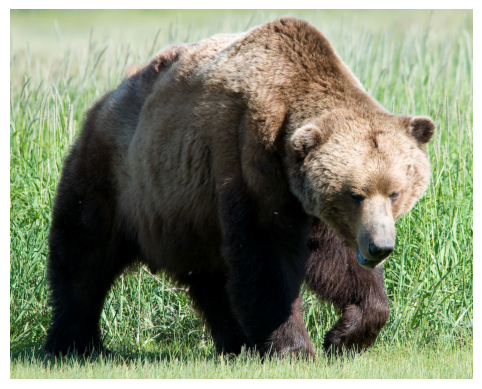

In [4]:
# sample execution (requires torchvision)
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

filename = './brown_bear.jpg'

input_image = Image.open(filename)
plt.imshow(input_image)
plt.axis('off')

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)

# normalize the output as probability
percentage = torch.nn.functional.softmax(output, dim=1)[0] * 100

# Load Imagenet Synsets
with open('./imagenet_synsets.txt', 'r') as f:
    synsets = f.readlines()

# len(synsets)==1001
# sysnets[0] == background
synsets = [x.strip() for x in synsets]
splits = [line.split(' ') for line in synsets]
key_to_classname = {spl[0]:' '.join(spl[1:]) for spl in splits}

with open('./imagenet_classes.txt', 'r') as f:
    class_id_to_key = f.readlines()

class_id_to_key = [x.strip() for x in class_id_to_key]

print('The best prediction:\n')
_, index = torch.max(output, 1)
classname = key_to_classname[class_id_to_key[index[0]]]
probability = percentage[index[0]].item()
print("'{}': {}% is a '{}'".format(filename, probability, classname))

print('\nTop 5 prediction:\n')
_, indices = torch.sort(output, descending=True)
for idx in indices[0][:5]:
    print("{}% is a '{}'".format(percentage[idx].item(), key_to_classname[class_id_to_key[idx]]))

The best prediction:

'./cat.jpg': 85.86328887939453% is a 'Persian cat'

Top 5 prediction:

85.86328887939453% is a 'Persian cat'
4.710124969482422% is a 'Egyptian cat'
4.16522216796875% is a 'lynx, catamount'
1.6420029401779175% is a 'tabby, tabby cat'
0.6602133512496948% is a 'Angora, Angora rabbit'


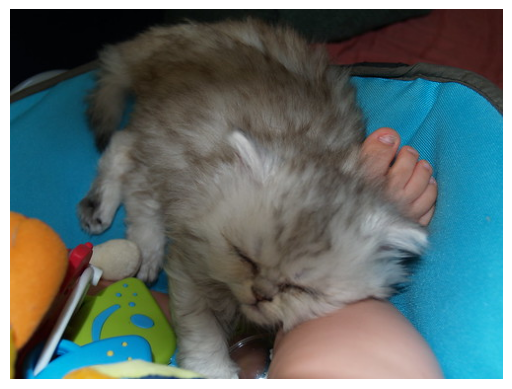

In [5]:
# sample execution (requires torchvision)
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

filename = './cat.jpg'

input_image = Image.open(filename)
plt.imshow(input_image)
plt.axis('off')

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)

# normalize the output as probability
percentage = torch.nn.functional.softmax(output, dim=1)[0] * 100

# Load Imagenet Synsets
with open('./imagenet_synsets.txt', 'r') as f:
    synsets = f.readlines()

# len(synsets)==1001
# sysnets[0] == background
synsets = [x.strip() for x in synsets]
splits = [line.split(' ') for line in synsets]
key_to_classname = {spl[0]:' '.join(spl[1:]) for spl in splits}

with open('./imagenet_classes.txt', 'r') as f:
    class_id_to_key = f.readlines()

class_id_to_key = [x.strip() for x in class_id_to_key]

print('The best prediction:\n')
_, index = torch.max(output, 1)
classname = key_to_classname[class_id_to_key[index[0]]]
probability = percentage[index[0]].item()
print("'{}': {}% is a '{}'".format(filename, probability, classname))

print('\nTop 5 prediction:\n')
_, indices = torch.sort(output, descending=True)
for idx in indices[0][:5]:
    print("{}% is a '{}'".format(percentage[idx].item(), key_to_classname[class_id_to_key[idx]]))

The best prediction:

'./dinosaur.jpg': 36.53086853027344% is a 'triceratops'

Top 5 prediction:

36.53086853027344% is a 'triceratops'
13.07999324798584% is a 'sturgeon'
11.308815956115723% is a 'common iguana, iguana, Iguana iguana'
5.64974308013916% is a 'rock python, rock snake, Python sebae'
3.6476094722747803% is a 'leatherback turtle, leatherback, leathery turtle, Dermochelys coriacea'


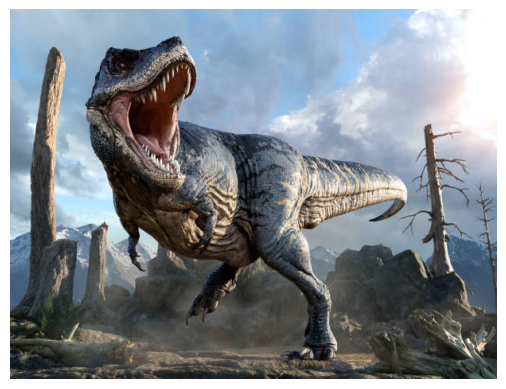

In [9]:
# sample execution (requires torchvision)
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

filename = './dinosaur.jpg'

input_image = Image.open(filename)
plt.imshow(input_image)
plt.axis('off')

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)

# normalize the output as probability
percentage = torch.nn.functional.softmax(output, dim=1)[0] * 100

# Load Imagenet Synsets
with open('./imagenet_synsets.txt', 'r') as f:
    synsets = f.readlines()

# len(synsets)==1001
# sysnets[0] == background
synsets = [x.strip() for x in synsets]
splits = [line.split(' ') for line in synsets]
key_to_classname = {spl[0]:' '.join(spl[1:]) for spl in splits}

with open('./imagenet_classes.txt', 'r') as f:
    class_id_to_key = f.readlines()

class_id_to_key = [x.strip() for x in class_id_to_key]

print('The best prediction:\n')
_, index = torch.max(output, 1)
classname = key_to_classname[class_id_to_key[index[0]]]
probability = percentage[index[0]].item()
print("'{}': {}% is a '{}'".format(filename, probability, classname))

print('\nTop 5 prediction:\n')
_, indices = torch.sort(output, descending=True)
for idx in indices[0][:5]:
    print("{}% is a '{}'".format(percentage[idx].item(), key_to_classname[class_id_to_key[idx]]))

The best prediction:

'./panda.jpg': 99.9721450805664% is a 'giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca'

Top 5 prediction:

99.9721450805664% is a 'giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca'
0.02011692337691784% is a 'indri, indris, Indri indri, Indri brevicaudatus'
0.003965679556131363% is a 'gibbon, Hylobates lar'
0.0013521579094231129% is a 'lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens'
0.0006775528891012073% is a 'titi, titi monkey'


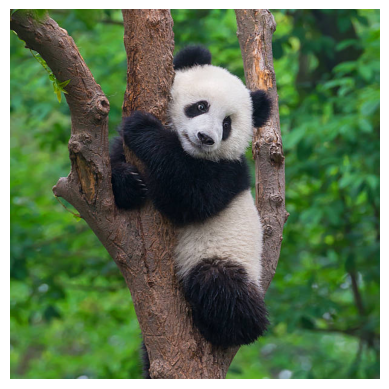

In [7]:
# sample execution (requires torchvision)
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

filename = './panda.jpg'

input_image = Image.open(filename)
plt.imshow(input_image)
plt.axis('off')

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)

# normalize the output as probability
percentage = torch.nn.functional.softmax(output, dim=1)[0] * 100

# Load Imagenet Synsets
with open('./imagenet_synsets.txt', 'r') as f:
    synsets = f.readlines()

# len(synsets)==1001
# sysnets[0] == background
synsets = [x.strip() for x in synsets]
splits = [line.split(' ') for line in synsets]
key_to_classname = {spl[0]:' '.join(spl[1:]) for spl in splits}

with open('./imagenet_classes.txt', 'r') as f:
    class_id_to_key = f.readlines()

class_id_to_key = [x.strip() for x in class_id_to_key]

print('The best prediction:\n')
_, index = torch.max(output, 1)
classname = key_to_classname[class_id_to_key[index[0]]]
probability = percentage[index[0]].item()
print("'{}': {}% is a '{}'".format(filename, probability, classname))

print('\nTop 5 prediction:\n')
_, indices = torch.sort(output, descending=True)
for idx in indices[0][:5]:
    print("{}% is a '{}'".format(percentage[idx].item(), key_to_classname[class_id_to_key[idx]]))

The best prediction:

'./black_bear.jpg': 87.5318374633789% is a 'American black bear, black bear, Ursus americanus, Euarctos americanus'

Top 5 prediction:

87.5318374633789% is a 'American black bear, black bear, Ursus americanus, Euarctos americanus'
5.451802730560303% is a 'brown bear, bruin, Ursus arctos'
3.2111291885375977% is a 'wild boar, boar, Sus scrofa'
2.67496395111084% is a 'sloth bear, Melursus ursinus, Ursus ursinus'
0.18731236457824707% is a 'hog, pig, grunter, squealer, Sus scrofa'


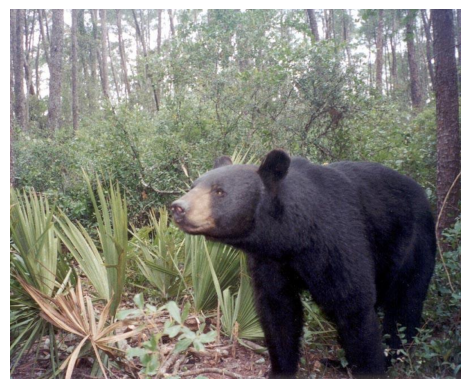

In [8]:
# sample execution (requires torchvision)
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

filename = './black_bear.jpg'

input_image = Image.open(filename)
plt.imshow(input_image)
plt.axis('off')

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)

# normalize the output as probability
percentage = torch.nn.functional.softmax(output, dim=1)[0] * 100

# Load Imagenet Synsets
with open('./imagenet_synsets.txt', 'r') as f:
    synsets = f.readlines()

# len(synsets)==1001
# sysnets[0] == background
synsets = [x.strip() for x in synsets]
splits = [line.split(' ') for line in synsets]
key_to_classname = {spl[0]:' '.join(spl[1:]) for spl in splits}

with open('./imagenet_classes.txt', 'r') as f:
    class_id_to_key = f.readlines()

class_id_to_key = [x.strip() for x in class_id_to_key]

print('The best prediction:\n')
_, index = torch.max(output, 1)
classname = key_to_classname[class_id_to_key[index[0]]]
probability = percentage[index[0]].item()
print("'{}': {}% is a '{}'".format(filename, probability, classname))

print('\nTop 5 prediction:\n')
_, indices = torch.sort(output, descending=True)
for idx in indices[0][:5]:
    print("{}% is a '{}'".format(percentage[idx].item(), key_to_classname[class_id_to_key[idx]]))

Create classification reports for each image (like above)

I made both the text version down below, and a proof that I made them and the results in the x-results.png files in which "x" stands for the file name. e.g. "dinosaur-results.png" or "brown-bear-results.png" I hyphenated it, apologies for the inconsistency.



The best prediction:

'./black_bear.jpg': 87.5318374633789% is a 'American black bear, black bear, Ursus americanus, Euarctos americanus'

Top 5 prediction:

87.5318374633789% is a 'American black bear, black bear, Ursus americanus, Euarctos americanus'
5.451802730560303% is a 'brown bear, bruin, Ursus arctos'
3.2111291885375977% is a 'wild boar, boar, Sus scrofa'
2.67496395111084% is a 'sloth bear, Melursus ursinus, Ursus ursinus'
0.18731236457824707% is a 'hog, pig, grunter, squealer, Sus scrofa'




The best prediction:

'./brown_bear.jpg': 93.286865234375% is a 'brown bear, bruin, Ursus arctos'

Top 5 prediction:

93.286865234375% is a 'brown bear, bruin, Ursus arctos'
5.045873165130615% is a 'bison'
1.1548506021499634% is a 'American black bear, black bear, Ursus americanus, Euarctos americanus'
0.28558996319770813% is a 'wombat'
0.080984927713871% is a 'sloth bear, Melursus ursinus, Ursus ursinus'

The best prediction:

'./cat.jpg': 85.86328887939453% is a 'Persian cat'

Top 5 prediction:

85.86328887939453% is a 'Persian cat'
4.710124969482422% is a 'Egyptian cat'
4.16522216796875% is a 'lynx, catamount'
1.6420029401779175% is a 'tabby, tabby cat'
0.6602133512496948% is a 'Angora, Angora rabbit'

The best prediction:

'./dinosaur.jpg': 36.53086853027344% is a 'triceratops'

Top 5 prediction:

36.53086853027344% is a 'triceratops'
13.07999324798584% is a 'sturgeon'
11.308815956115723% is a 'common iguana, iguana, Iguana iguana'
5.64974308013916% is a 'rock python, rock snake, Python sebae'
3.6476094722747803% is a 'leatherback turtle, leatherback, leathery turtle, Dermochelys coriacea'


The best prediction:

'./panda.jpg': 99.9721450805664% is a 'giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca'

Top 5 prediction:

99.9721450805664% is a 'giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca'
0.02011692337691784% is a 'indri, indris, Indri indri, Indri brevicaudatus'
0.003965679556131363% is a 'gibbon, Hylobates lar'
0.0013521579094231129% is a 'lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens'
0.0006775528891012073% is a 'titi, titi monkey'


The best prediction:

'./polar_bear.jpg': 99.87646484375% is a 'ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus'

Top 5 prediction:

99.87646484375% is a 'ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus'
0.10136964172124863% is a 'white wolf, Arctic wolf, Canis lupus tundrarum'
0.019349833950400352% is a 'Arctic fox, white fox, Alopex lagopus'
0.0025697059463709593% is a 'Samoyed, Samoyede'
0.00015759306552354246% is a 'kuvasz'


Read imagenet_classes.txt file, and report how many classes are for classification.

Answer:

1000 imagenet classes 
justification: "n15075141" is the last class in the table, VSCode editor reports 1000 lines, each line is one class. Thus, it is 1000 classes.

We can also see 1000 for the size in the Jupyter variables marked as class_id_to_key, list, 1000.

The proof visually is in imagenet-classes-proof.png if curious.

Read the code, and report what is the input image size and how many layers of operations in AlexNet

Let's use the dinosaur.jpg as an example. We can see from the input_image JpegImageFile, that size=612x465. So, technically the input image can be variable, as other images don't fit the same size. But, what happens in the code is that in:

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

we can see that it resizes the image to 256, then crops it to 224. We can check what the code uses as its size by checking the Jupyter variables, in which we see the variable input_batch Tensor marked as (1, 3, 224, 224), which indicates that the size of the image in the end when analyzing is 224x224 pixels large.

The proof of the variables from Jupyter will be in Jupyter-variables-proof.png

The amount of layers of operations in AlexNet would be 21 based on the output from the code above:

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=4096, out_features=4096, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=4096, out_features=1000, bias=True)
  )
)

13 features, 1 avgpool, 7 classifiers. We start the counting from 0 on 2 of them, so it's 1+12 features, 1 avgpool, 1+6 classifiers which is the equivalent of 13+1+7 = 21 layers.


1. Report two examples when AlexNet cannot correctly predict the class of the input image. You need to upload your results (e.g., screenshots) and try to explain why it fails.

2. Take this image (link) as input and show your results. Can you explain your findings about it?

The best prediction:

'./living-with-cats-dogs-689902.jpg': 26.309024810791016% is a 'tiger cat'

Top 5 prediction:

26.309024810791016% is a 'tiger cat'
13.07382583618164% is a 'tabby, tabby cat'
12.566262245178223% is a 'German shepherd, German shepherd dog, German police dog, alsatian'
12.481046676635742% is a 'Egyptian cat'
8.625587463378906% is a 'tiger, Panthera tigris'


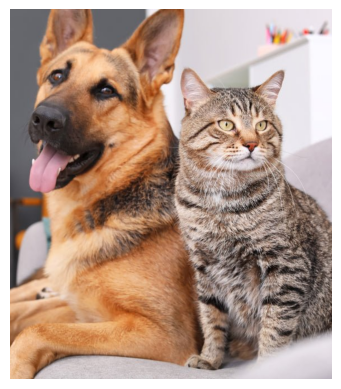

In [3]:
# sample execution (requires torchvision)
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

filename = './living-with-cats-dogs-689902.jpg'

input_image = Image.open(filename)
plt.imshow(input_image)
plt.axis('off')

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)

# normalize the output as probability
percentage = torch.nn.functional.softmax(output, dim=1)[0] * 100

# Load Imagenet Synsets
with open('./imagenet_synsets.txt', 'r') as f:
    synsets = f.readlines()

# len(synsets)==1001
# sysnets[0] == background
synsets = [x.strip() for x in synsets]
splits = [line.split(' ') for line in synsets]
key_to_classname = {spl[0]:' '.join(spl[1:]) for spl in splits}

with open('./imagenet_classes.txt', 'r') as f:
    class_id_to_key = f.readlines()

class_id_to_key = [x.strip() for x in class_id_to_key]

print('The best prediction:\n')
_, index = torch.max(output, 1)
classname = key_to_classname[class_id_to_key[index[0]]]
probability = percentage[index[0]].item()
print("'{}': {}% is a '{}'".format(filename, probability, classname))

print('\nTop 5 prediction:\n')
_, indices = torch.sort(output, descending=True)
for idx in indices[0][:5]:
    print("{}% is a '{}'".format(percentage[idx].item(), key_to_classname[class_id_to_key[idx]]))

The best prediction:

'./there-are-two-animals-that-are-standing-woods-together-generative-ai_1034036-66762.jpg': 29.15629768371582% is a 'hog, pig, grunter, squealer, Sus scrofa'

Top 5 prediction:

29.15629768371582% is a 'hog, pig, grunter, squealer, Sus scrofa'
13.493433952331543% is a 'wild boar, boar, Sus scrofa'
7.9796037673950195% is a 'red fox, Vulpes vulpes'
7.413844108581543% is a 'timber wolf, grey wolf, gray wolf, Canis lupus'
5.760602951049805% is a 'kit fox, Vulpes macrotis'


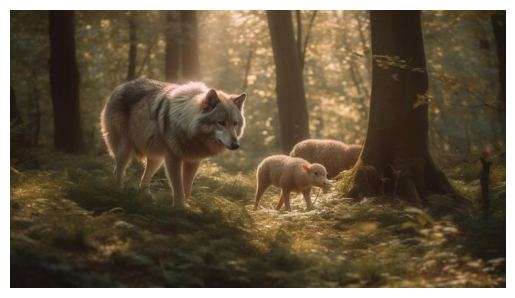

In [4]:
# sample execution (requires torchvision)
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

filename = './there-are-two-animals-that-are-standing-woods-together-generative-ai_1034036-66762.jpg'

input_image = Image.open(filename)
plt.imshow(input_image)
plt.axis('off')

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)

# normalize the output as probability
percentage = torch.nn.functional.softmax(output, dim=1)[0] * 100

# Load Imagenet Synsets
with open('./imagenet_synsets.txt', 'r') as f:
    synsets = f.readlines()

# len(synsets)==1001
# sysnets[0] == background
synsets = [x.strip() for x in synsets]
splits = [line.split(' ') for line in synsets]
key_to_classname = {spl[0]:' '.join(spl[1:]) for spl in splits}

with open('./imagenet_classes.txt', 'r') as f:
    class_id_to_key = f.readlines()

class_id_to_key = [x.strip() for x in class_id_to_key]

print('The best prediction:\n')
_, index = torch.max(output, 1)
classname = key_to_classname[class_id_to_key[index[0]]]
probability = percentage[index[0]].item()
print("'{}': {}% is a '{}'".format(filename, probability, classname))

print('\nTop 5 prediction:\n')
_, indices = torch.sort(output, descending=True)
for idx in indices[0][:5]:
    print("{}% is a '{}'".format(percentage[idx].item(), key_to_classname[class_id_to_key[idx]]))

The best prediction:

'./imageofpink.png': 50.9422492980957% is a 'cock'

Top 5 prediction:

50.9422492980957% is a 'cock'
19.63959312438965% is a 'hen'
4.9243693351745605% is a 'ostrich, Struthio camelus'
3.6175537109375% is a 'baboon'
3.21655535697937% is a 'patas, hussar monkey, Erythrocebus patas'


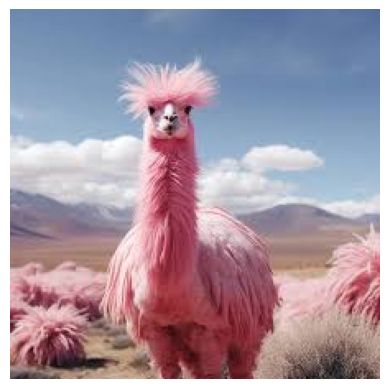

In [5]:
# sample execution (requires torchvision)
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

filename = './imageofpink.png'

input_image = Image.open(filename)
plt.imshow(input_image)
plt.axis('off')

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)

# normalize the output as probability
percentage = torch.nn.functional.softmax(output, dim=1)[0] * 100

# Load Imagenet Synsets
with open('./imagenet_synsets.txt', 'r') as f:
    synsets = f.readlines()

# len(synsets)==1001
# sysnets[0] == background
synsets = [x.strip() for x in synsets]
splits = [line.split(' ') for line in synsets]
key_to_classname = {spl[0]:' '.join(spl[1:]) for spl in splits}

with open('./imagenet_classes.txt', 'r') as f:
    class_id_to_key = f.readlines()

class_id_to_key = [x.strip() for x in class_id_to_key]

print('The best prediction:\n')
_, index = torch.max(output, 1)
classname = key_to_classname[class_id_to_key[index[0]]]
probability = percentage[index[0]].item()
print("'{}': {}% is a '{}'".format(filename, probability, classname))

print('\nTop 5 prediction:\n')
_, indices = torch.sort(output, descending=True)
for idx in indices[0][:5]:
    print("{}% is a '{}'".format(percentage[idx].item(), key_to_classname[class_id_to_key[idx]]))

1. Report two examples when AlexNet cannot correctly predict the class of the input image. You need to upload your results (e.g., screenshots) and try to explain why it fails.

2. Take this image (link) as input and show your results. Can you explain your findings about it?




1. I got two images that are not the image given in number 2. One is a complex AI generated nature scene which has multiple animals in it. It clearly has a wolf in it and one would assume that the image would probably generate wolf as the first or sheep.

Why it most likely fails is because it is AI generated and it's too complex (no exact target). This could lead the pretrained AI to make false assumptions since its training data has been of presumably real life images (which don't have the features that AI image generators naturally make).

The other image fails since it clearly depicts a pink llama. It was AI generated, so this could cause issue, but the main issue most likely is the fact that it's of a different colour than an actual llama. The AI is most likely not able to recognize that it's not a rooster because it doesn't know what a X coloured Y animal would look like due to the training data given to it. As a human you can tell if it's unnatural and can think outside of the box and not rely on things such as colour but only shape. While the AI might not.


2. The image given via the link gives conflicting results. It shows an image of a german shepherd and a tabby cat. While it does recognize that these things might exist in the image, since it needs to give one result only it has to get creative or make a choice between the two. I assume that it thought tiger cat because the tabby cat has features similar to a tiger cat, and maybe it also tried to assume "tiger" and "cat" due to the orange colour from the german shepherd combined with the tabby cat's stripes. Since the AI model is trained to try and give only one answer it tries to take in everything instead of describing the scene (which some other AIs are able to do).